# Chebyshev Interpolation Example

This notebook demonstrates how to use Chebyshev expansions for interpolation when the samples fall on the proper grid. The samples have to be on this grid, however.

In [1]:
from orthopoly.chebyshev import *
from numpy import *
import matplotlib.pyplot as plt
%matplotlib inline

First, I define a function to sample from and interpolate. In practice, the samples could measurements or anything else. The function here is simple and fast to evaluate, so you wouldn't need an interpolating function, but just imagine the function is cumbersome and slow or the measurements are very costly to get! We'll look at the range from $x=-6$ to $x=3$.

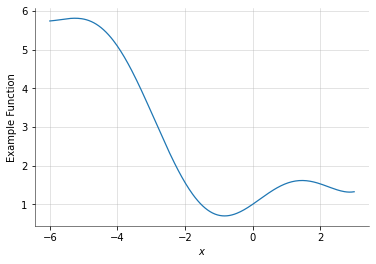

In [2]:
fun = lambda x: sin(1.1*x) + exp(x/2) - x
xa = -6
xb = 3

x = linspace(-6, 3, 250)
plt.plot(x, fun(x))
plt.ylabel('Example Function')
plt.xlabel('$x$')
plt.show()

Next, I setup the grid and get a function that will compute the coefficients for the interpolating chebyshev expansion. To start, I'll use 6 interpolation nodes.

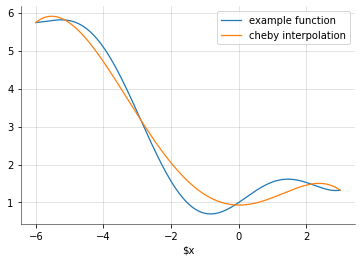

In [3]:
n = 6
#create grid and get function for computing coefs
xhat, θ, x, fcheb, S = cheby_dct_setup(xa, xb, n)
#sample the example function at the grid points
y = fun(x)
#compute expansion coefficients super easily!
a = fcheb(y)
#see how well the interpolation does
xx = linspace(xa, xb, 500)
yfun = fun(xx)
yche = cheby_sum(xx, a, xa, xb) #<-- evaluates cheby expansion
plt.plot(xx, yfun, label='example function')
plt.plot(xx, yche, label='cheby interpolation')
plt.xlabel('$x')
plt.legend()
plt.show()

Now let's see how much improvement we get if we add one more point.

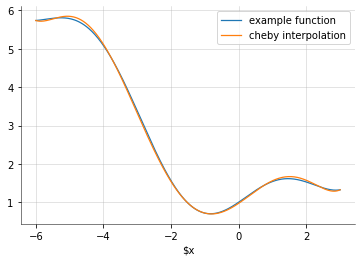

In [4]:
n = 7
#create grid and get function for computing coefs
xhat, θ, x, fcheb, S = cheby_dct_setup(xa, xb, n)
#sample the example function at the grid points
y = fun(x)
#compute expansion coefficients super easily!
a = fcheb(y)
#see how well the interpolation does
yfun = fun(xx)
yche = cheby_sum(xx, a, xa, xb) #<-- evaluates cheby expansion
plt.plot(xx, yfun, label='example function')
plt.plot(xx, yche, label='cheby interpolation')
plt.xlabel('$x')
plt.legend()
plt.show()

Starting to look pretty good with 7 points. We can also directly test the convergence rate as the number of points increases.

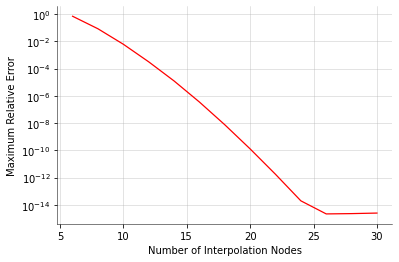

In [5]:
N = arange(6, 32, 2)
err = zeros((len(N),))
xx = linspace(xa, xb, 1000)
for i,n in enumerate(N):
    xhat, θ, x, fcheb, S = cheby_dct_setup(xa, xb, n)
    y = fun(x)
    a = fcheb(y)
    yfun = fun(xx)
    yche = cheby_sum(xx, a, xa, xb)
    err[i] = max(abs(yche - yfun)/abs(yfun))
plt.semilogy(N, err, 'r')
plt.xlabel('Number of Interpolation Nodes')
plt.ylabel('Maximum Relative Error')
plt.show()

After about 20 points, the relative error of the interpolating expansion is below about $10^{-10}$ everywhere along the curve. The classic "super-exponential" convergence or "infinite order" convergence is also on display. The error is bending downward as $N$ increases, even with the logarithmic y-axis. The error would decrease faster than any finite inverse power of $N$ for large $N$, but after about 25 nodes are used the error reaches machine precision.